In [1]:
!pip install geodatasets

In [13]:
# importando modulos necesarios
import numpy as np
import pandas as pd
# import pandas.io.data as web
import datetime as dt
# from pydataset import data
import statsmodels.api as sm


import geodatasets
import geopandas
from shapely.geometry import Polygon

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.animation as animation

from IPython.display import HTML

In [3]:

p1 = Polygon([(0, 0), (1, 0), (1, 1)])
p2 = Polygon([(0, 0), (1, 0), (1, 1), (0, 1)])
p3 = Polygon([(2, 0), (3, 0), (3, 1), (2, 1)])
g = geopandas.GeoSeries([p1, p2, p3])
g

0    POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1....
1    POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1....
2    POLYGON ((2.00000 0.00000, 3.00000 0.00000, 3....
dtype: geometry

In [4]:
gg = geopandas.GeoDataFrame({'geometry':[p1, p2, p3],
                             'color':np.array([0,0,1])})

<Axes: >

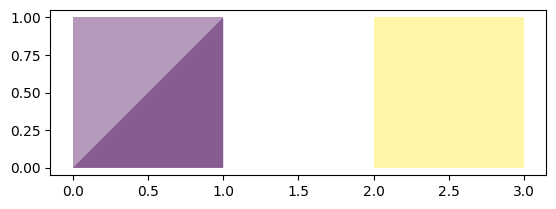

In [5]:
gg.plot(alpha=0.4,column='color', cmap = "viridis")

In [6]:
g1 = geopandas.GeoSeries([p1])
g2 = geopandas.GeoSeries([p2])
g3 = geopandas.GeoSeries([p3])

<Axes: >

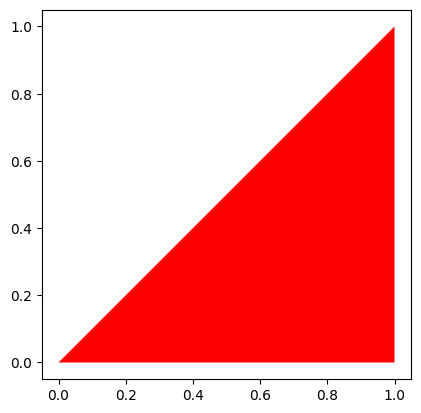

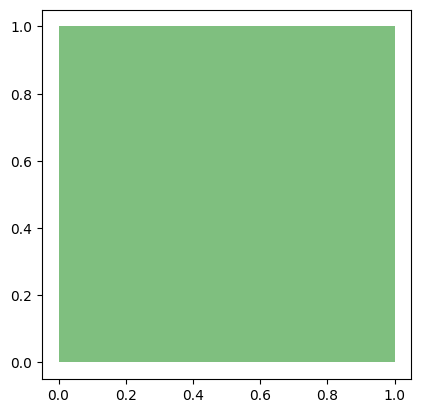

In [7]:
# ax =g1.plot(facecolor='r')
# ax =g2.plot(ax=ax)
# ax =g3.plot(ax=ax)
g1.plot(facecolor='r')
g2.plot(facecolor='g',alpha=0.5)

<Axes: >

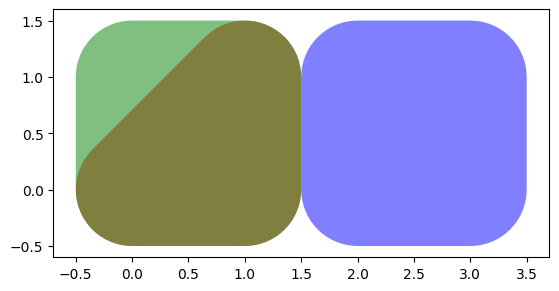

In [8]:
g.buffer(0.5).plot(alpha=0.5, color=['r','g','b'])

In [9]:
nybb_path = geodatasets.get_path('nybb')
boros = geopandas.read_file(nybb_path)
boros.set_index('BoroCode', inplace=True)
boros.sort_index(inplace=True)
boros

Extracting 'nybb_16a/nybb.shp' from '/root/.cache/geodatasets/nybb_16a.zip' to '/root/.cache/geodatasets/nybb_16a.zip.unzip'
Extracting 'nybb_16a/nybb.shx' from '/root/.cache/geodatasets/nybb_16a.zip' to '/root/.cache/geodatasets/nybb_16a.zip.unzip'
Extracting 'nybb_16a/nybb.dbf' from '/root/.cache/geodatasets/nybb_16a.zip' to '/root/.cache/geodatasets/nybb_16a.zip.unzip'
Extracting 'nybb_16a/nybb.prj' from '/root/.cache/geodatasets/nybb_16a.zip' to '/root/.cache/geodatasets/nybb_16a.zip.unzip'


,BoroName,Shape_Leng,Shape_Area,geometry
BoroCode,,,,
1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."
3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."


<Axes: >

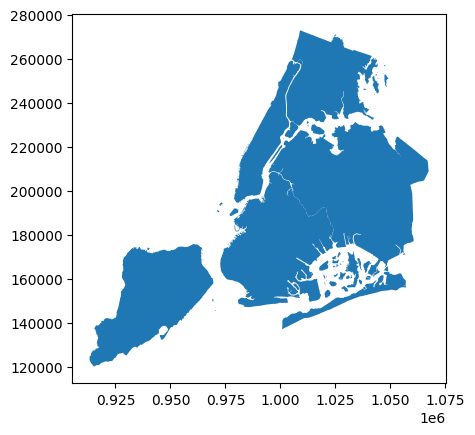

In [10]:
# nybb_path = geodatasets.get_path('nybb')
# boros = geopandas.read_file(nybb_path)
boros.plot()

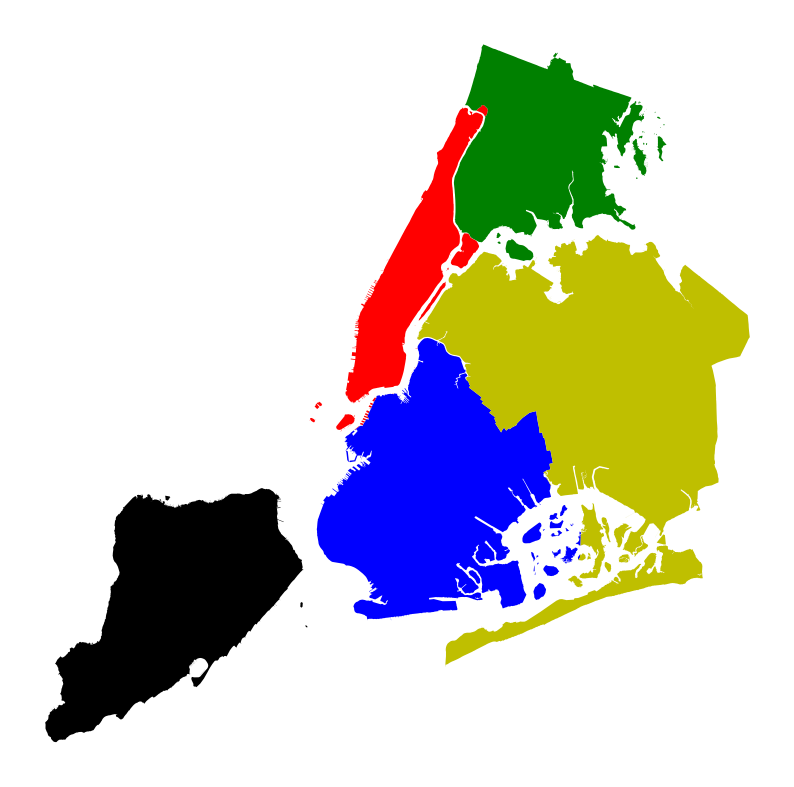

In [11]:
# boros.set_index('BoroCode', inplace=True)
# boros.sort_index(inplace=True)
fig, ax = plt.subplots(1,1,figsize=(10,10))
ax = boros.plot(ax=ax,color=['r', 'g', 'b', 'y', 'k'])
ax.axis('off')
fig.show()

In [14]:

frames = [] # for storing the generated images
fig, ax2 = plt.subplots(1,1)

def plot_frame(year):
    ax2.axis('off')
    boros.plot(ax=ax2,color=np.random.permutation(['r', 'g', 'b', 'y', 'k']),
               edgecolor='black',linewidth=2)

    plt.close()


anim = animation.FuncAnimation(fig, plot_frame,
                    frames = range(6),
                    interval = 300)


HTML(anim.to_jshtml())
# HTML(anim.to_html5_video())
# ani.save(filename="ffmpeg_example.mp4", writer="ffmpeg")
# ani.save(filename="pillow_example.gif", writer="pillow")